In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error, mean_squared_error



In [2]:

data = pd.read_csv("./ML471_S4_Datafile_Concept.csv")

data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

data = data[['Consumption', 'Festivals/Special_events']]

data.dropna(inplace=True)


train_size = int(len(data) * 0.8)

train = data.iloc[:train_size]
test  = data.iloc[train_size:]

y_train = train['Consumption']
y_test  = test['Consumption']

exog_train = train[['Festivals/Special_events']]
exog_test  = test[['Festivals/Special_events']]


print("\nGranger Causality Test Results")
print("-" * 40)




Granger Causality Test Results
----------------------------------------


In [3]:


granger_data = data[['Consumption', 'Festivals/Special_events']]

grangercausalitytests(
    granger_data,
    maxlag=12,
    verbose=True
)


model = SARIMAX(
    y_train,
    exog=exog_train,
    order=(1, 0, 2),
    seasonal_order=(0, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit(disp=False)

print(model_fit.summary())


forecast = model_fit.get_forecast(
    steps=len(test),
    exog=exog_test
)

forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3712  , p=0.0120  , df_denom=393, df_num=1
ssr based chi2 test:   chi2=6.4199  , p=0.0113  , df=1
likelihood ratio test: chi2=6.3684  , p=0.0116  , df=1
parameter F test:         F=6.3712  , p=0.0120  , df_denom=393, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.6644 , p=0.0000  , df_denom=390, df_num=2
ssr based chi2 test:   chi2=27.6791 , p=0.0000  , df=2
likelihood ratio test: chi2=26.7524 , p=0.0000  , df=2
parameter F test:         F=13.6644 , p=0.0000  , df_denom=390, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1172  , p=0.0261  , df_denom=387, df_num=3
ssr based chi2 test:   chi2=9.5208  , p=0.0231  , df=3
likelihood ratio test: chi2=9.4076  , p=0.0243  , df=3
parameter F test:         F=3.1172  , p=0.0261  , df_denom=387, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2370  , p=0.2946  

d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          Consumption   No. Observations:                  317
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -643.379
Date:                              Fri, 06 Feb 2026   AIC                           1298.758
Time:                                      10:10:30   BIC                           1320.777
Sample:                                  01-01-1988   HQIC                          1307.580
                                       - 05-01-2014                                         
Covariance Type:                                opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Festivals/Special_events     0.0871      0.060      1.454      0.146  

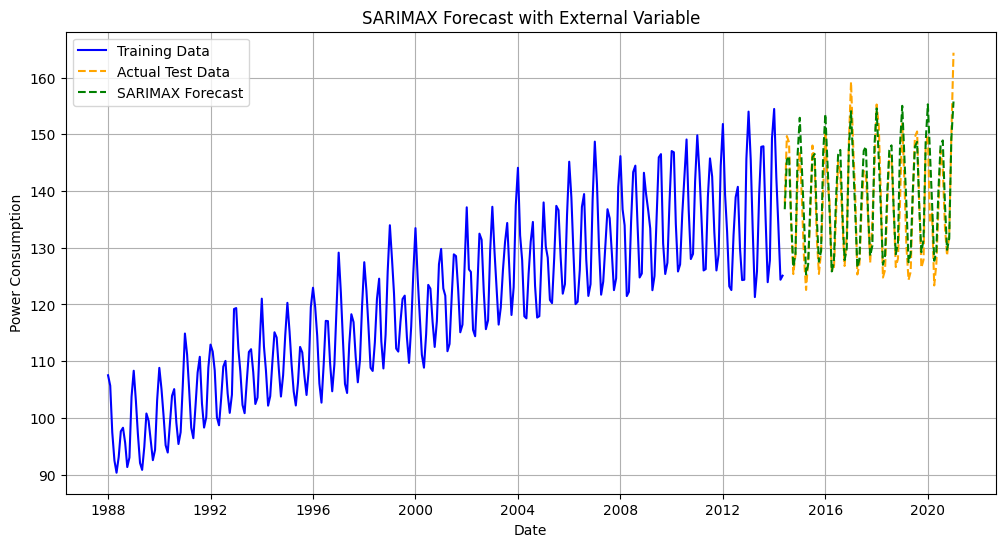


Model Performance Metrics
----------------------------------------
MAE  : 2.843
RMSE : 3.633
MAPE : 2.05%


In [4]:

plt.figure(figsize=(12, 6))

plt.plot(train.index, y_train, label='Training Data', color='blue')
plt.plot(test.index, y_test, label='Actual Test Data', color='orange', linestyle='--')
plt.plot(test.index, forecast_mean, label='SARIMAX Forecast', color='green', linestyle='--')


plt.title("SARIMAX Forecast with External Variable")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()


mae = mean_absolute_error(y_test, forecast_mean)
rmse = np.sqrt(mean_squared_error(y_test, forecast_mean))
mape = np.mean(np.abs((y_test - forecast_mean) / y_test)) * 100

print("\nModel Performance Metrics")
print("-" * 40)
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAPE : {mape:.2f}%")